<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/master/module5/hw18_text_to_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/250 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 7 files:   0%|          | 0/7 [00:00<?, ?it/s]

unet/config.json:   0%|          | 0.00/1.67k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/317 [00:00<?, ?B/s]

movq/config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/5.01G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

model_index.json:   0%|          | 0.00/501 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/2.01k [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

prior/config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

image_processor/preprocessor_config.json:   0%|          | 0.00/315 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.69G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/4.10G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2.py:202: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/100 [00:00<?, ?it/s]

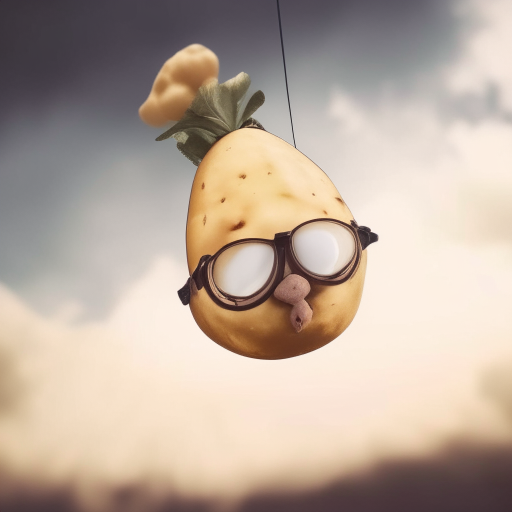

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

pipeline = AutoPipelineForText2Image.from_pretrained(
	"kandinsky-community/kandinsky-2-2-decoder", torch_dtype=torch.float16
).to("cuda")

generator = torch.Generator("cuda").manual_seed(31)

image = pipeline("A Potato with a parachute and glasses, falling out of a plane ", generator=generator).images[0]
image